In [10]:
%matplotlib inline
from matplotlib.backends.backend_pgf import PdfPages
import matplotlib.pyplot as plt
import PyPDF2 
import pickle
import github_analysis.freq_graph as fg
import github_analysis.motif_finder as mf
from importlib import reload
import joypy
import pandas as pd
import seaborn as sns
import numpy as np
import github_analysis.data_layer as dl

import warnings
warnings.filterwarnings('ignore')

### Notes

Get # of branches
Get branch length before merge

In [104]:
#Load data
# clusters looks like {cluster_id:[123,456,...]} where 123 and 456 are proj ids in that cluster
pickle_in = open("./results/motifs_by_cluster.pickle","rb")
motifs_by_cluster = pickle.load(pickle_in)

pickle_in = open("./results/clusters.pickle","rb")
clusters = pickle.load(pickle_in)

# Load Data
comm_auth_by_proj = pd.read_csv('data/author_commits_by_proj.csv').set_index('p_id')
pr_cr_by_proj = pd.read_csv('data/pr_cr_by_proj.csv').set_index('p_id')
issues_by_proj = pd.read_csv('data/issues_by_proj.csv').set_index('p_id')
owner_age_by_proj = pd.read_csv('data/owner_age_by_proj.csv').set_index('p_id')

project = pd.concat([comm_auth_by_proj,pr_cr_by_proj,issues_by_proj,owner_age_by_proj],axis=1)

In [105]:
#",".join(list(project.index.astype(str)))

# Overall

In [108]:
project.describe()

,commits,authors,prs,code_reviews,issues,owner_age
count,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9866.000000
mean,29.897593,1.594905,0.642735,0.622797,2.867284,554.331847
std,406.795767,4.252519,28.004370,47.495913,75.382407,578.111194
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,69.000000
50%,6.000000,1.000000,0.000000,0.000000,0.000000,374.000000
75%,15.000000,2.000000,0.000000,0.000000,0.000000,863.000000
max,24461.000000,229.000000,2760.000000,4709.000000,5934.000000,3094.000000


## Motif

This is an explanation of motifs 

In [109]:
# data_path = "../RStudio-Data-Repository/clean_data/commits.feather"
# commits_dl = dl.data_layer(data_path,min_number_commits=1)
# motifs_overall = mf.get_motifs(project.index.values,5,1000,commits_dl)

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

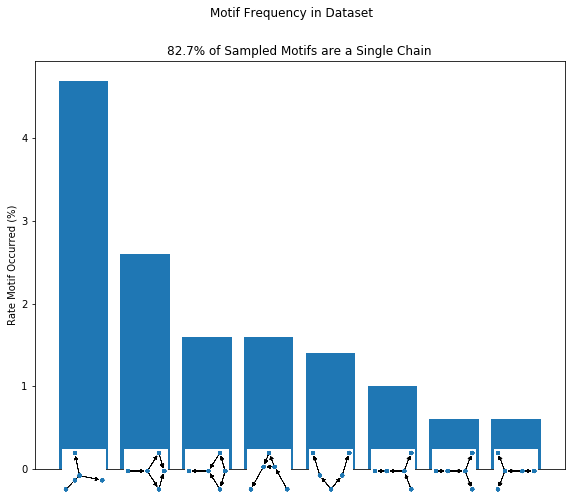

In [110]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_overall)

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

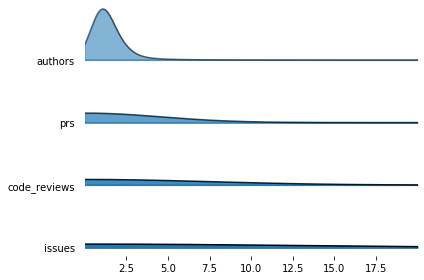

In [111]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(project[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

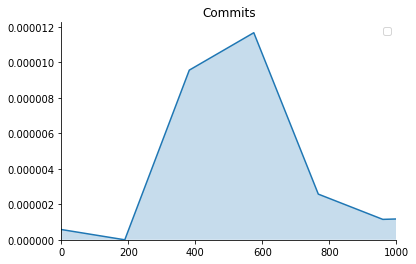

In [112]:
ax = sns.kdeplot(project.commits,shade=True,)
ax.set_xlim([0,1000])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

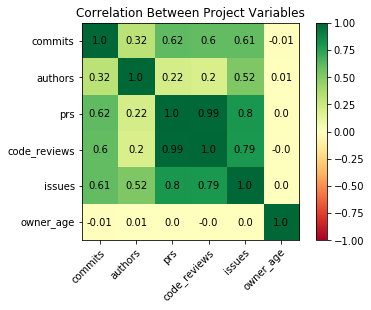

In [113]:
p = project.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(project.columns)))
ax.set_yticks(np.arange(len(project.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(project.columns,rotation='vertical')
ax.set_yticklabels(project.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(project.columns)):
    for j in range(len(project.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Cluster 0

In [114]:
cluster0 = project[project.index.isin(clusters[0])]

In [115]:
cluster0.describe()

,commits,authors,prs,code_reviews,issues,owner_age
count,288.000000,288.000000,288.000000,288.000000,288.000000,280.000000
mean,99.434028,3.413194,1.361111,0.121528,7.253472,681.467857
std,216.561912,11.881797,7.686915,1.040548,39.664117,613.901641
min,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.750000,1.000000,0.000000,0.000000,0.000000,144.000000
50%,50.000000,2.000000,0.000000,0.000000,0.000000,561.000000
75%,101.000000,3.000000,0.000000,0.000000,2.000000,1089.750000
max,3224.000000,177.000000,122.000000,14.000000,610.000000,2764.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

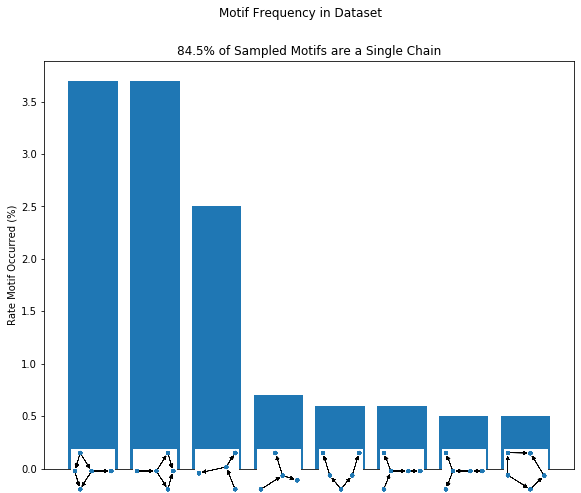

In [116]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[0])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

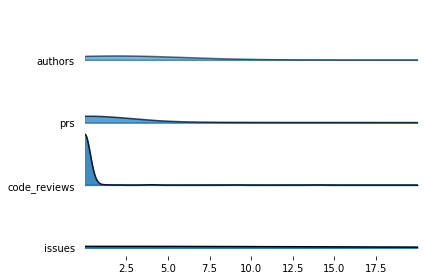

In [117]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster0[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

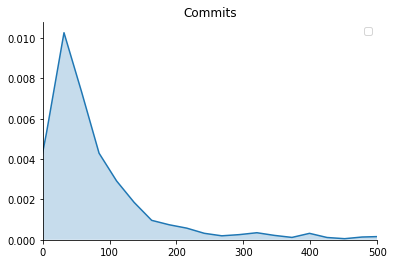

In [118]:
ax = sns.kdeplot(cluster0.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

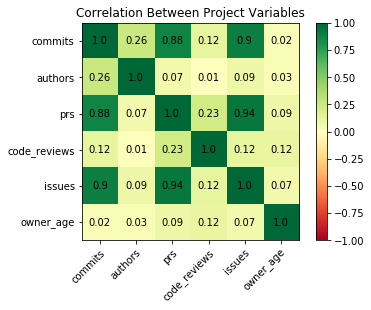

In [119]:
p = cluster0.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Cluster 1

In [120]:
cluster1 = project[project.index.isin(clusters[1])]

In [121]:
cluster1.describe()

,commits,authors,prs,code_reviews,issues,owner_age
count,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2307.000000
mean,6.862263,1.265112,0.047496,0.007772,0.237478,582.316428
std,9.160745,0.582399,1.291737,0.317836,2.625789,586.107415
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000,0.000000,0.000000,91.000000
50%,6.000000,1.000000,0.000000,0.000000,0.000000,408.000000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,883.500000
max,412.000000,8.000000,61.000000,15.000000,101.000000,2850.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

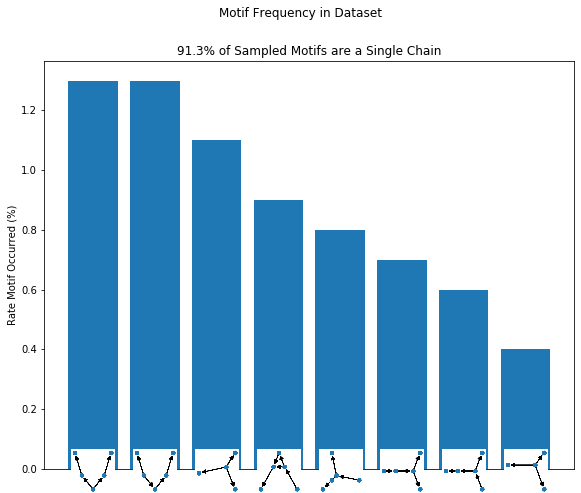

In [122]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[1])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

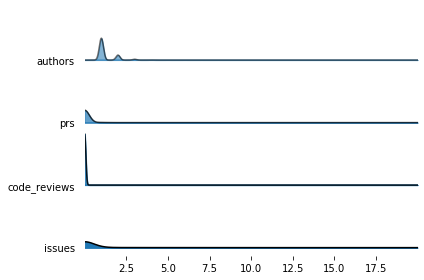

In [123]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster1[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

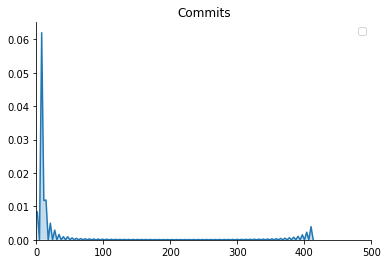

In [124]:
ax = sns.kdeplot(cluster1.commits,shade=True)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

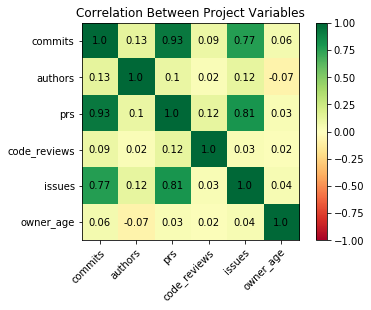

In [125]:
p = cluster1.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Cluster 2

In [126]:
cluster2 = project[project.index.isin(clusters[2])]

In [127]:
cluster2.describe()

,commits,authors,prs,code_reviews,issues,owner_age
count,160.000000,160.000000,160.000000,160.000000,160.000000,156.000000
mean,523.487500,6.975000,25.581250,32.125000,74.900000,550.705128
std,2693.033281,19.127493,218.927071,372.658607,497.710042,604.087627
min,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,0.000000,0.000000,0.000000,49.000000
50%,61.500000,3.000000,0.000000,0.000000,6.000000,371.000000
75%,136.250000,5.000000,7.250000,0.000000,25.250000,827.500000
max,24461.000000,154.000000,2760.000000,4709.000000,5934.000000,3042.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

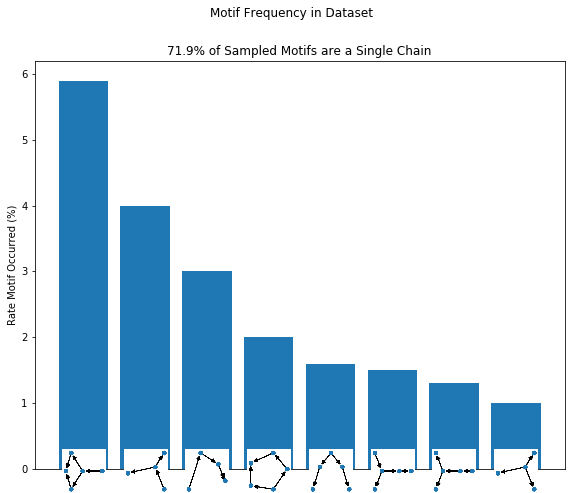

In [128]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[2])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

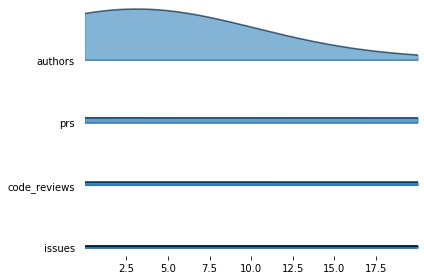

In [129]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster2[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

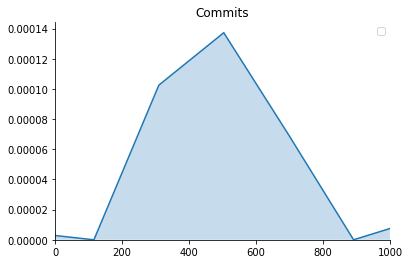

In [130]:
ax = sns.kdeplot(cluster2.commits,shade=True,)
ax.set_xlim([0,1000])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

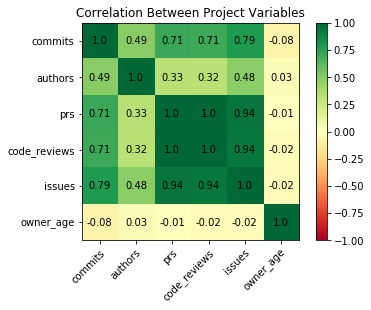

In [131]:
p = cluster2.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Cluster 3

In [132]:
cluster3 = project[project.index.isin(clusters[3])]

In [133]:
cluster3.describe()

,commits,authors,prs,code_reviews,issues,owner_age
count,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,3429.000000
mean,3.286502,1.160522,0.104499,0.013643,0.289695,491.203850
std,12.192135,0.425737,1.759855,0.392422,3.839132,549.872701
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,39.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,292.000000
75%,3.000000,1.000000,0.000000,0.000000,0.000000,757.000000
max,455.000000,7.000000,71.000000,15.000000,147.000000,3094.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

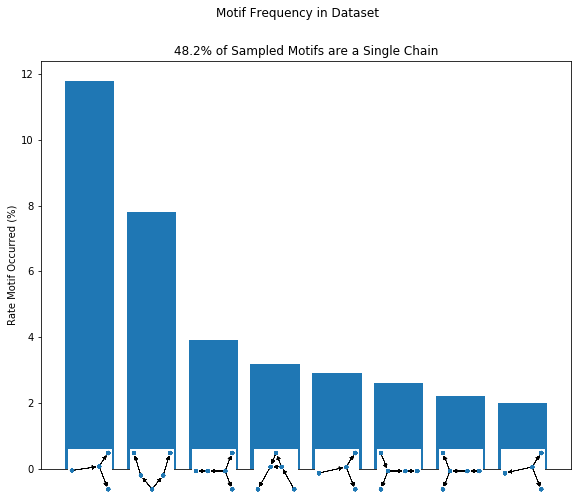

In [134]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[3])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

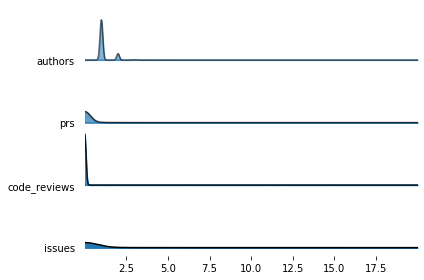

In [135]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster3[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

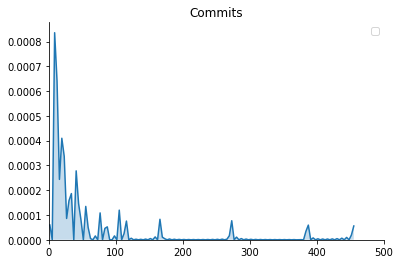

In [136]:
ax = sns.kdeplot(cluster3.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

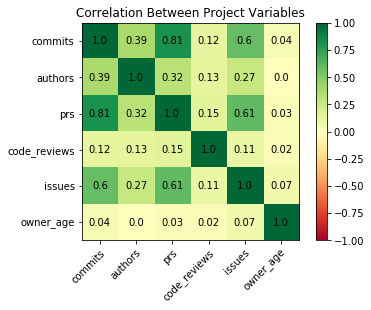

In [137]:
p = cluster3.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Cluster 4

In [138]:
cluster4 = project[project.index.isin(clusters[4])]

In [139]:
cluster4.describe()

,commits,authors,prs,code_reviews,issues,owner_age
count,190.000000,190.000000,190.000000,190.000000,190.000000,188.000000
mean,229.442105,3.436842,2.794737,4.463158,24.273684,676.877660
std,1454.022050,16.643594,11.663944,28.360234,251.175330,646.770687
min,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,0.000000,0.000000,0.000000,156.500000
50%,43.500000,1.000000,0.000000,0.000000,0.000000,548.000000
75%,101.750000,2.000000,0.000000,0.000000,2.000000,1055.500000
max,19730.000000,229.000000,116.000000,295.000000,3457.000000,2796.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

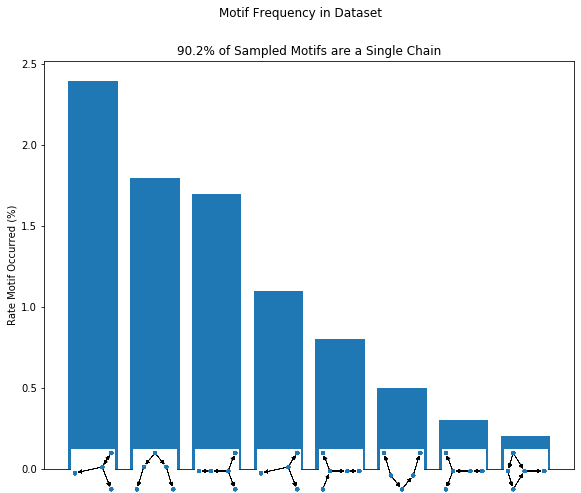

In [140]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[4])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

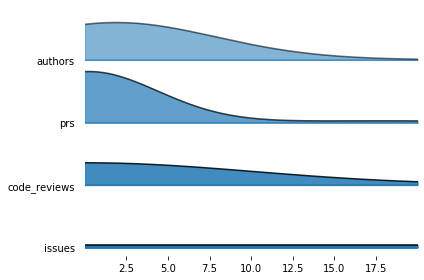

In [141]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster4[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

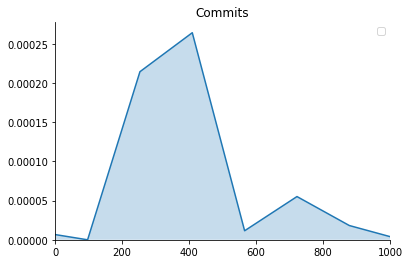

In [142]:
ax = sns.kdeplot(cluster4.commits,shade=True,)
ax.set_xlim([0,1000])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

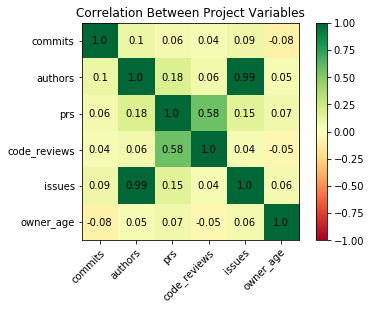

In [143]:
p = cluster4.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Cluster 5

In [144]:
cluster5 = project[project.index.isin(clusters[5])]

In [145]:
cluster5.describe()

,commits,authors,prs,code_reviews,issues,owner_age
count,703.000000,703.000000,703.000000,703.000000,703.000000,696.000000
mean,11.642959,1.537696,0.618777,0.052632,1.718350,461.860632
std,17.192284,2.213257,1.212372,0.609811,5.563187,554.019452
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,3.750000
50%,6.000000,1.000000,0.000000,0.000000,1.000000,232.500000
75%,12.500000,2.000000,1.000000,0.000000,2.000000,767.500000
max,219.000000,54.000000,13.000000,12.000000,115.000000,2979.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

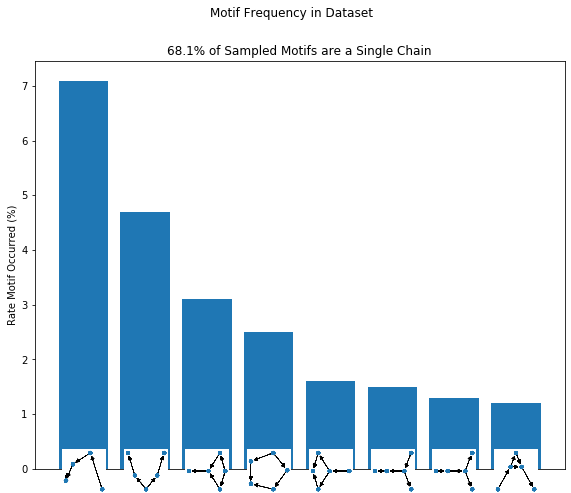

In [146]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[5])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

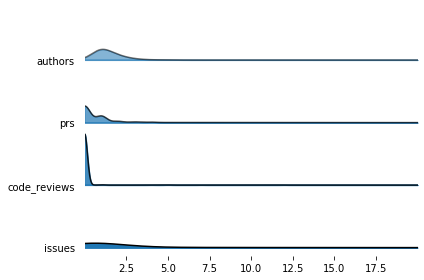

In [147]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster5[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

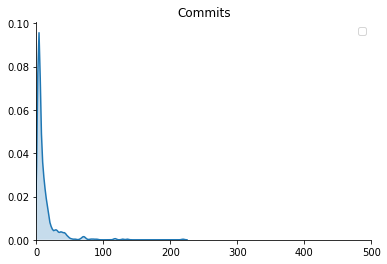

In [148]:
ax = sns.kdeplot(cluster5.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

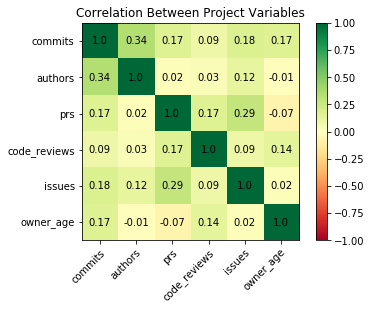

In [149]:
p = cluster5.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Cluster 6

In [150]:
cluster6 = project[project.index.isin(clusters[0])]

In [151]:
cluster6.describe()

,commits,authors,prs,code_reviews,issues,owner_age
count,288.000000,288.000000,288.000000,288.000000,288.000000,280.000000
mean,99.434028,3.413194,1.361111,0.121528,7.253472,681.467857
std,216.561912,11.881797,7.686915,1.040548,39.664117,613.901641
min,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.750000,1.000000,0.000000,0.000000,0.000000,144.000000
50%,50.000000,2.000000,0.000000,0.000000,0.000000,561.000000
75%,101.000000,3.000000,0.000000,0.000000,2.000000,1089.750000
max,3224.000000,177.000000,122.000000,14.000000,610.000000,2764.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

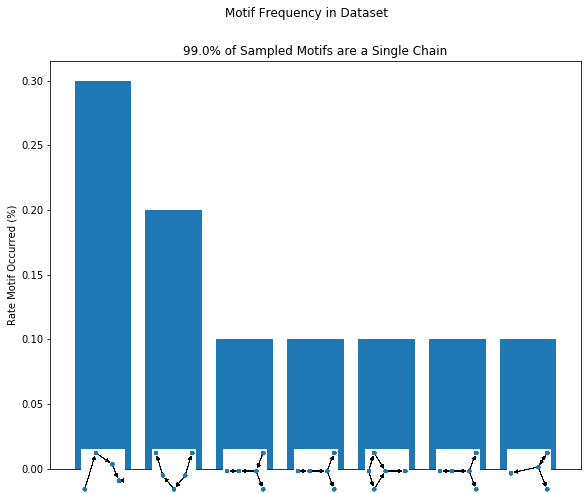

In [152]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[6])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

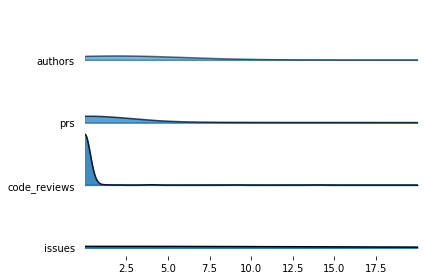

In [153]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster6[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

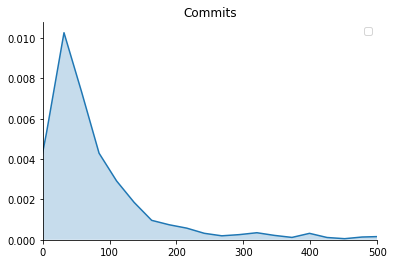

In [154]:
ax = sns.kdeplot(cluster6.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

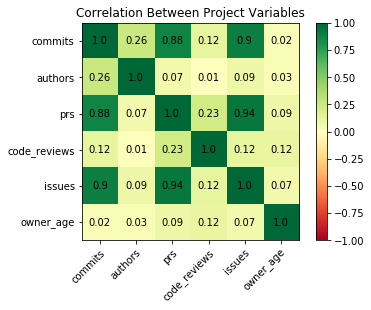

In [155]:
p = cluster6.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Cluster 7

In [156]:
cluster7 = project[project.index.isin(clusters[7])]

In [157]:
cluster7.describe()

,commits,authors,prs,code_reviews,issues,owner_age
count,392.000000,392.000000,392.000000,392.000000,392.000000,390.000000
mean,79.163265,2.589286,0.102041,0.010204,2.548469,551.982051
std,114.136473,3.242491,0.479552,0.142674,13.130963,566.710340
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,0.000000,0.000000,0.000000,84.250000
50%,42.000000,2.000000,0.000000,0.000000,0.000000,385.500000
75%,82.000000,3.000000,0.000000,0.000000,0.000000,859.750000
max,1007.000000,43.000000,6.000000,2.000000,167.000000,3058.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

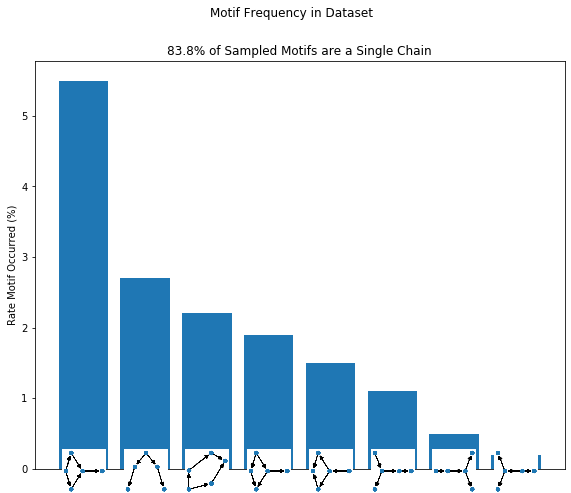

In [158]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[7])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

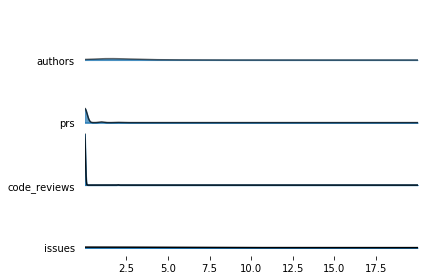

In [159]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster7[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

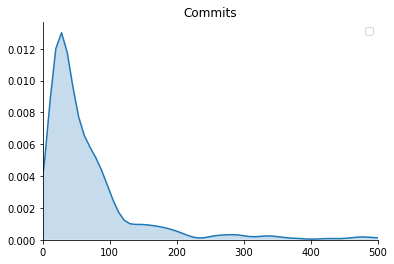

In [160]:
ax = sns.kdeplot(cluster7.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

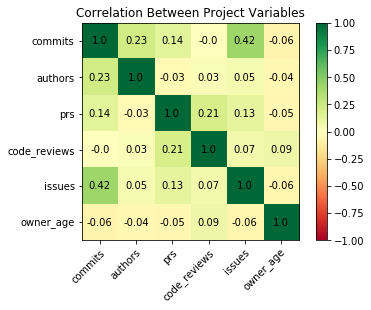

In [161]:
p = cluster7.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Cluster 8

In [162]:
cluster8 = project[project.index.isin(clusters[8])]

In [163]:
cluster8.describe()

,commits,authors,prs,code_reviews,issues,owner_age
count,437.000000,437.000000,437.000000,437.000000,437.000000,434.000000
mean,31.860412,2.000000,0.496568,0.048055,6.398169,606.322581
std,101.807974,2.620491,1.882589,0.605765,47.970096,565.916434
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,0.000000,0.000000,0.000000,118.000000
50%,11.000000,1.000000,0.000000,0.000000,0.000000,480.000000
75%,20.000000,2.000000,0.000000,0.000000,1.000000,950.250000
max,1205.000000,36.000000,15.000000,9.000000,780.000000,2434.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

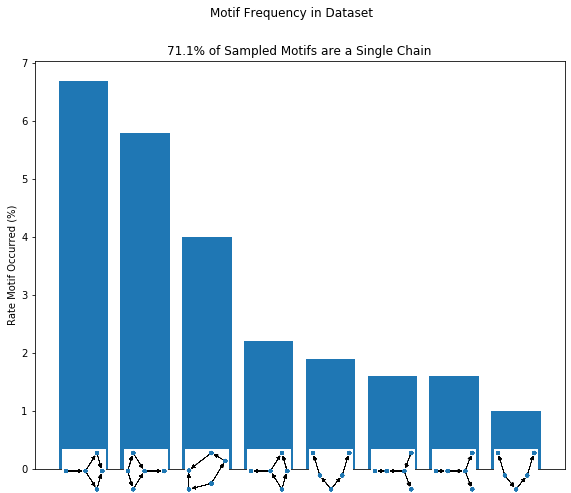

In [164]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[8])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

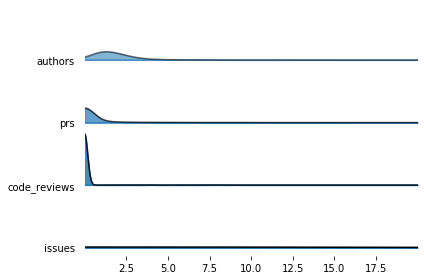

In [165]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster8[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

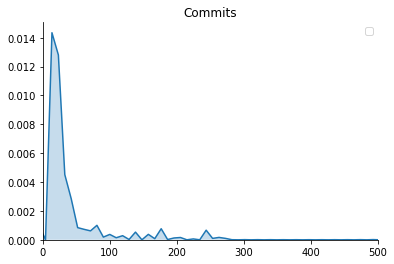

In [166]:
ax = sns.kdeplot(cluster8.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

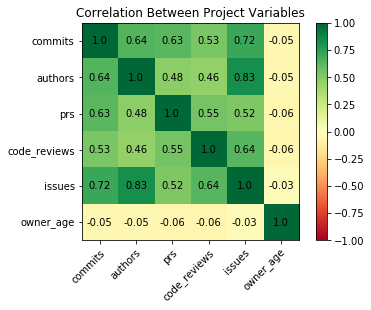

In [167]:
p = cluster8.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Cluster 9

In [168]:
cluster9 = project[project.index.isin(clusters[9])]

In [169]:
cluster9.describe()

,commits,authors,prs,code_reviews,issues,owner_age
count,335.000000,335.000000,335.000000,335.000000,335.000000,329.000000
mean,18.017910,1.710448,0.304478,0.101493,1.197015,593.276596
std,21.223497,1.631385,0.893997,1.803647,4.134345,603.993952
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000,0.000000,0.000000,97.000000
50%,11.000000,1.000000,0.000000,0.000000,0.000000,412.000000
75%,22.000000,2.000000,0.000000,0.000000,1.000000,918.000000
max,146.000000,22.000000,8.000000,33.000000,52.000000,2955.000000


## Motif

This is an explanation of motifs 

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

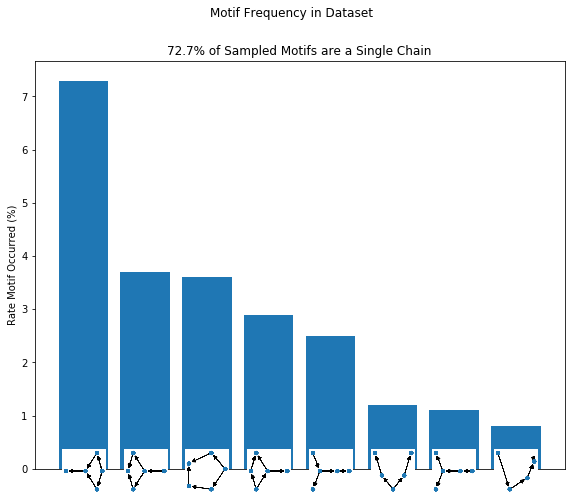

In [170]:
cluster_visual = fg.visualize_motif_samples_bar_graph(motifs_by_cluster[9])

## Radial

This is an explanation of radial

## GitHub Distributions

Here is a distribution of authors, commits, issues, pull requests, and code reviews

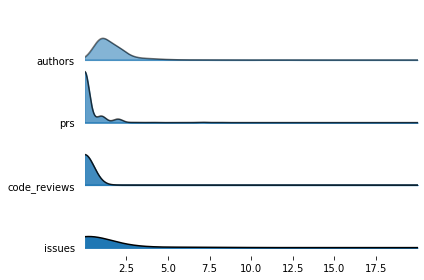

In [171]:
fig, ax = plt.subplots(4,1)
_=joypy.joyplot(cluster9[['authors','prs','code_reviews','issues']],x_range=[0,20],fade=True,overlap=False,ax=ax)

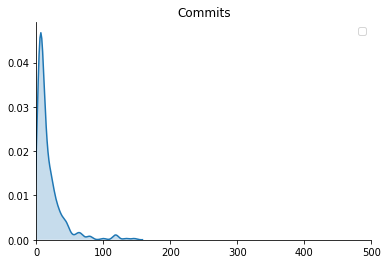

In [172]:
ax = sns.kdeplot(cluster9.commits,shade=True,)
ax.set_xlim([0,500])
sns.despine()
ax.legend('')
_=ax.set_title('Commits')

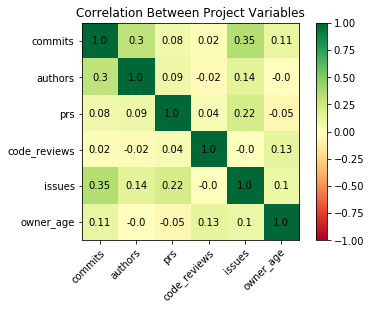

In [173]:
p = cluster9.corr().values #'spearman'

fig, ax = plt.subplots()
im = ax.imshow(p,cmap='RdYlGn',vmin=-1,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cluster0.columns)))
ax.set_yticks(np.arange(len(cluster0.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(cluster0.columns,rotation='vertical')
ax.set_yticklabels(cluster0.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cluster0.columns)):
    for j in range(len(cluster0.columns)):
        text = ax.text(j, i, round(p[i, j],2),
                       ha="center", va="center", color="k")

ax.set_title("Correlation Between Project Variables")
ax.figure.colorbar(im)
#fig.tight_layout()
#plt.colorbar()
plt.show()

## Indices

This is an index

## Representative Projects

---

# Compare Clusters 2 and 3

In [174]:
cluster2.head()

,commits,authors,prs,code_reviews,issues,owner_age
p_id,,,,,,
937,12406,129,56,5,2059,329.0
61810,85,9,1,0,62,48.0
92288,27,2,1,0,69,477.0
208321,147,11,0,0,74,779.0
210281,31,4,1,0,5,220.0


In [175]:
#",".join(list(cluster2.index.values.astype(str)))

In [176]:
cluster3.head()

,commits,authors,prs,code_reviews,issues,owner_age
p_id,,,,,,
22315,3,1,0,0,0,0.0
34110,2,1,0,0,0,46.0
99878,4,2,0,0,0,276.0
103841,3,2,0,0,0,1267.0
105478,2,2,0,0,0,0.0


In [177]:
#",".join(list(cluster3.sample(160).index.values.astype(str)))

### Compare big projects

In [178]:
cluster2[(cluster2.commits>100)].head()

,commits,authors,prs,code_reviews,issues,owner_age
p_id,,,,,,
937,12406,129,56,5,2059,329.0
208321,147,11,0,0,74,779.0
321869,24461,82,2760,4709,5934,438.0
1956492,308,1,0,0,77,NaN
3598525,554,6,1,0,29,5.0


<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

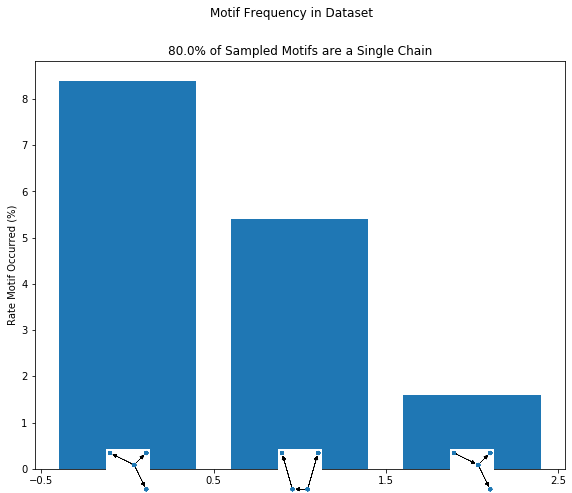

In [252]:
motif_cluster2 = mf.get_motifs(cluster2.index.values,4,1000,commits_dl)
_=fg.visualize_motif_samples_bar_graph(motif_cluster2,motifs_to_show=3)

In [179]:
cluster3[(cluster3.commits>100)].head()

,commits,authors,prs,code_reviews,issues,owner_age
p_id,,,,,,
184165,115,5,3,0,6,195.0
4725260,455,4,35,0,69,1424.0
18610074,105,4,7,0,7,594.0
28216603,167,5,14,0,26,1732.0
35254632,386,7,41,0,75,516.0


<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

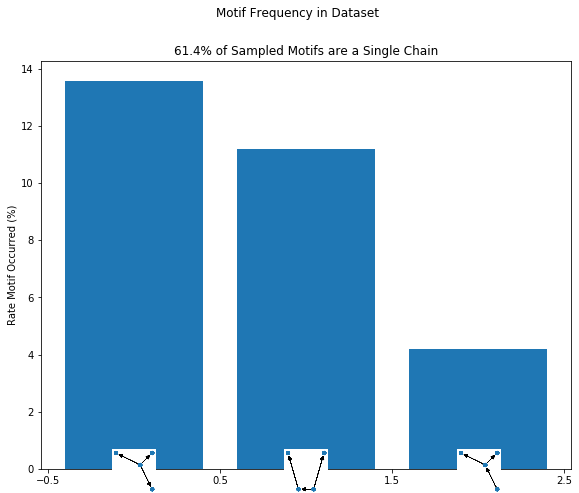

In [253]:
motif_cluster3 = mf.get_motifs(cluster3.index.values,4,1000,commits_dl)
_=fg.visualize_motif_samples_bar_graph(motif_cluster3,motifs_to_show=3)

Why does the less interesting cluster have more interesting motifs?

Cluster 2

https://github.com/arresteddevops/podcast
https://github.com/coderyuhui/test
https://github.com/SomethingExplosive/android_device_moto_shamu-kernel
https://github.com/marqueexss/----marquee-xss
https://github.com/fzanetti/obligatorioA2
https://github.com/Git-Training-Aug4/Web-Training
https://github.com/turingschool/mentor-appointments
https://github.com/saylordotorg/course_bio305
https://github.com/schultz-it/detainsearchescortDZE
https://github.com/MirtlBu/dating
https://github.com/gbecchio/git_openclassroom3
https://github.com/bschmitt/laravel-amqp
https://github.com/wafto/temoa
https://github.com/jamesmgittins/dopeslingertycoon
https://github.com/Babouchot/twerking-panzerbrigade
https://github.com/awslabs/aws-big-data-blog
https://github.com/JakeWharton/RxBinding
https://github.com/wso2/wso2-rampart
https://github.com/sanger-pathogens/Bio-RNASeq
https://github.com/veetase/community
https://github.com/gouf/tweet_weather_bot
https://github.com/Lewis-Ho/Reverse
https://github.com/Autumn/cammap
https://github.com/wagnerrp/pytmdb3
https://github.com/Opinari/OnTheFenceUI
https://github.com/scriby/browser-harness
https://github.com/fb-hackathon-hcii/collablocks
https://github.com/dwyl/learn-tdd
https://github.com/reidcovington/smartipantsgame
https://github.com/Reactive-Extensions/rx.angular.js
https://github.com/clubee/EvoAlerta
https://github.com/RuiAAPeres/KirKos
https://github.com/wordpress-mobile/WordPress-iOS
https://github.com/anoopg87/phonestatelistener
https://github.com/sLite/gitflow-demo
https://github.com/letterj/oohhc
https://github.com/jihye-eventsource/mvp
https://github.com/daneal2u/android_vendor_du
https://github.com/CodeSammich/amber_shine
https://github.com/clifton26/WeightLossWebApp
https://github.com/eaho1/Spooky-Spoils
https://github.com/maturano/symfony-base
https://github.com/concrete5-composer/concrete5-core
https://github.com/QuatreCentQuatre/caspian
https://github.com/toppatch/toppatch-server
https://github.com/garguelles/shoutbux
https://github.com/noteworthynicole/final-project
https://github.com/PawanHUB/MergeTest
https://github.com/mougeCM/muni-admin
https://github.com/ChevalCorp/RayTracer
https://github.com/RequireSun/SchoolHomepage
https://github.com/chasmodo/android_art
https://github.com/lbar314/thesis_project
https://github.com/KayEss/fost-web
https://github.com/wangjinlong9788/wangjinlong9788.github.io
https://github.com/anair13/splititwitme
https://github.com/ivan-uskov/dnaclub
https://github.com/WellCommerce/ComposerPlugin
https://github.com/jazzsequence/museum-core
https://github.com/vampd/drupal
https://github.com/afaan5556/afaan5556.github.io
https://github.com/grails/grails-core
https://github.com/smartnsoft/hackathon-direct-energie-2013
https://github.com/alanstevens/ChocoPackages
https://github.com/eskimosoup/tra
https://github.com/lnbcoding/raccoon_twitter
https://github.com/red-spotted-newts-2014/strong-times
https://github.com/serge-v/dotfiles
https://github.com/tomrittervg/decrypt-windows-ec2-passwd
https://github.com/mkremins/flense-nw
https://github.com/emacs-jp/migemo
https://github.com/JoelEinbinder/JS100
https://github.com/pcnicklaus/tech.jobbing
https://github.com/combatdave/Reconesse
https://github.com/rpanjwani/madlibs
https://github.com/byuidealabs/tdf
https://github.com/DeviceConnect/DeviceConnect-JS
https://github.com/Yuth-Set/cms
https://github.com/awm4j/Asiph-Game
https://github.com/measurement-kit/network-meter
https://github.com/chiafang/IOS
https://github.com/humble-bundle-forms/HumbleForms
https://github.com/karudedios/dnc
https://github.com/cismet/cidsbean-json-patch
https://github.com/DarriusWrightGD/learning-directx12
https://github.com/abclive/Lightning
https://github.com/dylanjha/tweetwhat
https://github.com/raylwalters/groupProject
https://github.com/Camachof/aaProjects
https://github.com/skthinks/Movies
https://github.com/robi09/rohas-lite
https://github.com/ssj71/OSC2MIDI
https://github.com/hxx0215/MuPDFMirror
https://github.com/alexandrdragin/Absolutix-s-site
https://github.com/firegento/firegento-dynamiccategory
https://github.com/suryametla/test
https://github.com/mrsonicblue/theaquanauts
https://github.com/SalesforceFoundation/CampaignTools
https://github.com/WhaleLLC/Whalellc.github.io
https://github.com/pbinkley/jekyll-book-marriage
https://github.com/dacechavez/silverfi
https://github.com/TheTyee/election.thetyee.ca
https://github.com/edupugantiv/hicomm_web
https://github.com/smonette/microblog_lab
https://github.com/nguy/artview
https://github.com/cobbdb/jsinclude
https://github.com/zayng/autotest
https://github.com/VoQn/js-practice
https://github.com/x-hansong/EasyChat
https://github.com/Ostrovski/cancharts
https://github.com/chovancova/IT_CAMP
https://github.com/vispy/vispy.js
https://github.com/Manawasp/goodrecipes-api
https://github.com/SethArchambault/CastleFortify
https://github.com/soyto/soyto.github.io
https://github.com/blakebuck/grade-a-lator
https://github.com/bizancomSmartPhoneAppDeveloper1/TripShot
https://github.com/genesix/genesixCommon
https://github.com/maternitynet/maternitynet.github.io
https://github.com/youyidecai/yigeWechat
https://github.com/jogojokodi/jogojokodi
https://github.com/kentcdodds/all-contributors
https://github.com/nicolewalter/MyProject
https://github.com/devvoh/parable
https://github.com/CKOTech/checkout-woocommerce-plugin
https://github.com/doTell/doTell
https://github.com/pagekit/extension-tinymce
https://github.com/zhoushuangfe/footballSNS
https://github.com/Jeffrey-Hackford/NetRush
https://github.com/deahoum/Project-Tera
https://github.com/takeroibuki/work
https://github.com/Callisto13/Battleships
https://github.com/kaplali/parkstorm
https://github.com/microhackathon-2015-03-juglodz/microhackathon-2015-03-juglodz.github.io
https://github.com/JohnKlaras/group-project-html-css
https://github.com/jslegers/emoji-icon-font
https://github.com/manumohan1234/InsuranceApp
https://github.com/ccnmtl/countryx
https://github.com/StephenProjet/ProjetMethodoProd
https://github.com/TeamExodus/packages_services_Telephony
https://github.com/lumifyio/lumify
https://github.com/kullen/DatabaseProject
https://github.com/npi-ufc-qxd/gpa-pesquisa
https://github.com/teampoltergeist/poltergeist
https://github.com/fathens/Cordova-Plugin-Crashlytics
https://github.com/RubyLouvre/mmRequest
https://github.com/shawncothran/snailephant
https://github.com/rurtle/ProgramCreek
https://github.com/lostlandark/google-web-fundamentals-simplified-chinese
https://github.com/magento-freedom/magento
https://github.com/bennie12345/mythe
https://github.com/jhcict/grans-learn
https://github.com/bigswitch/openstack-networking-bigswitch
https://github.com/Peter-Wilson/Musicify
https://github.com/qiime/qiime.github.com
https://github.com/Piorjade/DoorOS-3.0-ComputerCraft-
https://github.com/johnoko/CrowdWakaApp
https://github.com/WhatBin/hello-world
https://github.com/rogovsky/LearningRemoteGit
https://github.com/brotherlogic/records

Cluster 3

https://github.com/Ignacio-Fuertes/datasciencecoursera
https://github.com/jeduan/eventos
https://github.com/isakkarlsson/ucr-suite-2d
https://github.com/dafaluntan6/dafaluntan6.github.io
https://github.com/aumohanraj/opengts
https://github.com/skipallmighty/TutRequests
https://github.com/gagesalas/Puchitox
https://github.com/soyteleco/mail-telnet
https://github.com/SpyderproGaming/rays-change-log
https://github.com/chrisa/arduino
https://github.com/blankenbush/WebApplication1
https://github.com/larrykoubiak/WebScraperGenerator
https://github.com/evorine/ArrayBindingTest
https://github.com/awikiqwi/unablejournal68
https://github.com/Fingerflow/test-composer-planet
https://github.com/vijayrawatsan/spring-mvc-test
https://github.com/jiankehtt/javaSmallDemo
https://github.com/stereolux/scenopulse
https://github.com/giggi1226/DoubleEndedPriorityQueue
https://github.com/cwalsh1979/wipro-webcrawler
https://github.com/mirandagrace/json_bouy
https://github.com/katy-tsai/react-router-test
https://github.com/bindhyeswari/Descartes-22-Apr-2
https://github.com/nla/burp
https://github.com/dwightgunning/cards
https://github.com/dess21/myrepo
https://github.com/RafPe/ansible-role-keepaliveD
https://github.com/poshjosh/newsminute
https://github.com/xring/get-hands-dirty
https://github.com/facejiong/react-component
https://github.com/alexandrubagu/C-CPlusPlus
https://github.com/jfrazier11/Codewars-Mumbling
https://github.com/AlexParamonov/enco
https://github.com/rito-rclbps/rails_tutorial
https://github.com/varCharlie/iterm-color-test
https://github.com/mfalesni/appsanity-lettuce
https://github.com/rowy/css3playground
https://github.com/tbagrel1/extract_plan
https://github.com/KiokaMediaBankUNAL/PROYECTO20162
https://github.com/linrubin8/WebClient
https://github.com/Aghosh993/EE_HWDEV_KiCAD
https://github.com/Minotaurus1906/Universal
https://github.com/vitamin5x/docker-dev
https://github.com/orionispax/woodworking
https://github.com/drcastile/resume
https://github.com/Lunacat66/Luna-s-sand-box
https://github.com/chadgappa/try_git
https://github.com/happyMOOyear/FlurpSim
https://github.com/Zbyl/GitTool
https://github.com/VasylZalizetskiy/PolygonsEditor
https://github.com/09liweis/Auria
https://github.com/lgcnstemp/myrepo
https://github.com/sinky/azur-post-geotag
https://github.com/manavsethi/LocationReader
https://github.com/zimengle/Here_Demo
https://github.com/Rhoxio/RPG
https://github.com/syksteaz/myapp
https://github.com/calingrigorescu/Tema-IIT
https://github.com/rudaoshi/corenlp-client
https://github.com/zeroasterisk/meteor-contextio-simple
https://github.com/jongrover/oo-doogie-owner-houser
https://github.com/hoodiehq/bundle-bump-bot
https://github.com/davesolanki/bossable
https://github.com/okamurayasuyuki/js_pagination
https://github.com/Abhijit-Kayande/Ios-JellyView
https://github.com/koktear/FeatureViewController
https://github.com/qiaoming1990321/CellAutoHeight
https://github.com/enhive/messagehive
https://github.com/xiao00li/harvard_home
https://github.com/Na-Ira/Brandmedia
https://github.com/WilliamPat/Overwhelm
https://github.com/imoussa/test1
https://github.com/adminstock/htan-runner
https://github.com/Dajaka/First-Respository
https://github.com/sidodinh88/Remember
https://github.com/lostmind/RealmTutorial
https://github.com/elikem/parcel
https://github.com/posbo/learning-extjs
https://github.com/traithanh/channel-gwt-caro-v1
https://github.com/oriongeek/RubyCUPP
https://github.com/ZC-Wei/ZC-Wei.github.io
https://github.com/ahmetalpbalkan/test-repo
https://github.com/rodstaff/react-SPA
https://github.com/karinfdez/ember-practice-controllers
https://github.com/Aldair2023/AlgoritmoS15
https://github.com/SPJ1998/Sirius_Aeropuerto
https://github.com/rogeriochaves/zapti-bitbucket
https://github.com/thetntcrafterteam/downloads
https://github.com/enriquegm82/NorthwindRepLE
https://github.com/rwfpl/rewolf-ldrdebug
https://github.com/djchen/oauth2-fitbit
https://github.com/jrscampelo/SCP-Sistema-de-Controle-de-Ponto
https://github.com/theonlychase/mini-TimeDirective-Week4-Day2
https://github.com/andrewpanasyuk/MenuDrink
https://github.com/seakun/StatTracker
https://github.com/sawaiseiya0820/collection
https://github.com/Dx724/EnableWinTracking
https://github.com/BrianKoester/RefactorU-CLIENT8-Infinite-Agenda
https://github.com/norway240/Norway240-ChromeExtension
https://github.com/urtaza/planets
https://github.com/moniker001/lol_api_challenge
https://github.com/Komashka/my-first-blog
https://github.com/cluborega/HuffmanCoding
https://github.com/UnknownLuck/Git-Testing
https://github.com/eriknoorland/nodepi
https://github.com/bachmac/pennypusher
https://github.com/HDLSmile/HDL1521
https://github.com/robalba1/datasciencecoursera
https://github.com/HKBU2014ITM/worksheet
https://github.com/Jaaromy/JsonFormatter
https://github.com/BlueDreamFly/bluedreamfly.github.com
https://github.com/abstractcodify/php-facebook-sdk
https://github.com/33windowlicker/crawler
https://github.com/saeed81/data_portal_aces
https://github.com/rwldrn/descriptor
https://github.com/zhenggaofengA/okok
https://github.com/semnil/ST8K
https://github.com/tillberg/bismuth2
https://github.com/fabian818/express-conf
https://github.com/rayafoteva/pragmatic_js
https://github.com/maarjal/fav3-forEach
https://github.com/idsqat1/repo-idsqat3-API-Collaborate-GH-1465826852195
https://github.com/gennady/playground
https://github.com/jgpelaez/docker-git-lfs
https://github.com/wildebeestdev/css-style-guide
https://github.com/flimberger/qsmerge
https://github.com/goadesign/encoding
https://github.com/gerbaudo/ReadTuple
https://github.com/voby/lay
https://github.com/tomkyle/exceptions
https://github.com/mashfiqcse13/AI-chatbot
https://github.com/jgb11/escuela-it-webcomponents
https://github.com/waitinghu/DataManager
https://github.com/cheng2014/JavaGame
https://github.com/bpeisenbraun/homebrew-misc
https://github.com/TakahashiShuuhei/first_app
https://github.com/randreucetti/scala-practice
https://github.com/ahasall/angularJS-playframework
https://github.com/albertzzy/stylus-bicolumn-layout
https://github.com/jedrichards/fla-text-processor-jsfl
https://github.com/Arvind01/Orkin-App
https://github.com/coull/Coull-InApp-SDK-iOS
https://github.com/ninegrind/spotfix
https://github.com/Snipoukos/Ask-2
https://github.com/artemn/docker-debian-riak
https://github.com/USUM/AndroidClass1
https://github.com/lnaef/mytest
https://github.com/ncockram/Davids_Ant
https://github.com/mark-arthur89/Assignment
https://github.com/goodniceweb/vimrc
https://github.com/adamblake/PracticeMVC2
https://github.com/SovietBear/xStreamDemo
https://github.com/tomrandolph/Winding-Control
https://github.com/LearnPractice/OOP_make_clock
https://github.com/iuscommunity-pkg/php70u-pecl-smbclient
https://github.com/acamogh/django_api_login
https://github.com/cuonghv91/hoangtung
https://github.com/Florian1209/Argol
https://github.com/CLaigit/a2
https://github.com/nmthang/Document

---

#### Active projects for different levels of experience

In [192]:
new_active = project[(project.owner_age==0)&(project.commits>100)]
print(len(new_active))
new_active.head()

28


,commits,authors,prs,code_reviews,issues,owner_age
p_id,,,,,,
120581,494,8,1,0,62,0.0
125897,303,2,0,0,1,0.0
1807791,101,3,0,0,0,0.0
2508794,149,3,0,0,19,0.0
3463751,136,2,0,0,0,0.0


<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

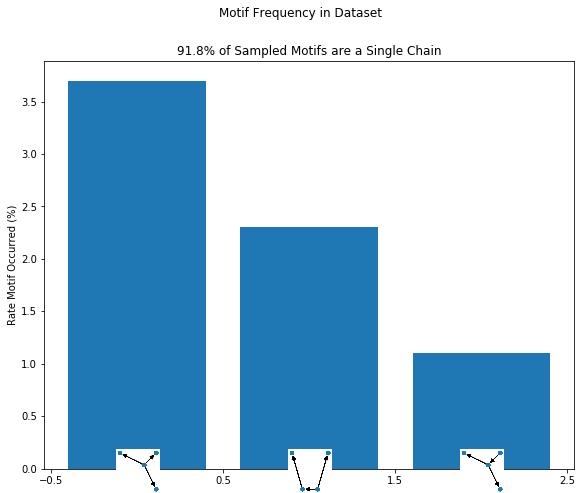

In [250]:
motif_new_active = mf.get_motifs(new_active.index.values,4,1000,commits_dl)
_=fg.visualize_motif_samples_bar_graph(motif_new_active,motifs_to_show=3)

In [195]:
#",".join(list(new_active.index.astype(str)))

https://github.com/progettoPACS/PROGETTO
https://github.com/ncar-mlso/comp-utilities
https://github.com/feiwhomai/code
https://github.com/usc-isi-i2/Web-Karma
https://github.com/xukan840730/mathematical_optimization
https://github.com/icerupt/icerupt.github.io
https://github.com/danielmusic/bugfree-happiness
https://github.com/jamesmgittins/dopeslingertycoon
https://github.com/it-innovation/sam
https://github.com/sixteencolors/sixteencolors
https://github.com/gs2-2/paper.hub
https://github.com/Opinari/OnTheFenceUI
https://github.com/a-morn/OhLookDiamonds
https://github.com/jihye-eventsource/mvp
https://github.com/concrete5-composer/concrete5-core
https://github.com/Readom/HackerNewsJSON
https://github.com/loxosceles/UNAM-Programacion_Avanzada
https://github.com/kupcimat/SkiSchool
https://github.com/racamirko/Common-Sense-Net-2
https://github.com/pgtogether/webcollection
https://github.com/alok-webonise/alok-assignment
https://github.com/innovacion-DPF/innovacion-DPF.github.io
https://github.com/soyto/soyto.github.io
https://github.com/Echx/CapCalc
https://github.com/jogojokodi/jogojokodi
https://github.com/luiz04nl/liquidity
https://github.com/devvoh/parable
https://github.com/ehbhotel/ehbhotel

In [194]:
old_active = project[(project.owner_age>700)&(project.commits>100)]
print(len(old_active))
old_active.head()

121


,commits,authors,prs,code_reviews,issues,owner_age
p_id,,,,,,
52097,558,36,6,0,537,817.0
64153,202,4,0,0,54,733.0
148304,257,2,0,0,0,1372.0
182512,129,3,0,0,0,1774.0
208321,147,11,0,0,74,779.0


<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

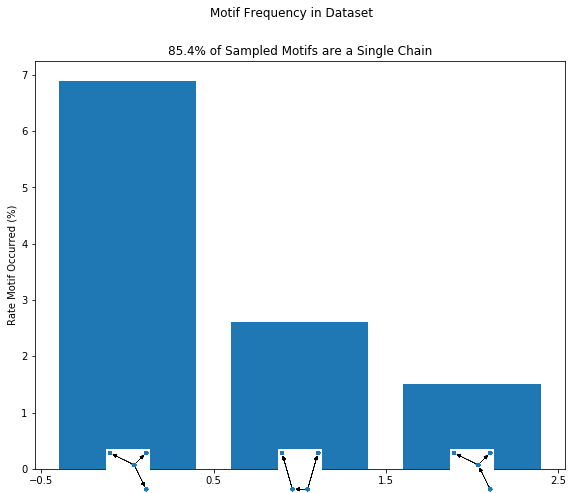

In [251]:
motif_old_active = mf.get_motifs(old_active.index.values,4,1000,commits_dl)
_=fg.visualize_motif_samples_bar_graph(motif_old_active,motifs_to_show=3)

In [198]:
#",".join(list(old_active.sample(25).index.astype(str)))

https://github.com/tianocore/edk2-OvmfPkg
https://github.com/mattcg/cjsDelivery
https://github.com/art-vybor/twnews
https://github.com/ericrowan/ericrowan.github.io
https://github.com/creilly/sitzlabexpcontrol
https://github.com/stackbuilders/inflections-hs
https://github.com/evgeny-myasishchev/juliapagano
https://github.com/angular/protractor
https://github.com/nyanp/tiny-cnn
https://github.com/trackway-project/trackway
https://github.com/hashbang/shell-etc
https://github.com/ubpb/katalog
https://github.com/ssj71/OSC2MIDI
https://github.com/brianmcn/minecraft-map-manipulator
https://github.com/evinstk/TantechEngineOriginal
https://github.com/udacity/responsive-images
https://github.com/kaidez/kdz
https://github.com/klpdotorg/dubdubdub
https://github.com/Essomia/template-simplify
https://github.com/TimBuckley/appa-hacktathon
https://github.com/AlbertArion/com.ucourse
https://github.com/brunoseivam/ADEiger
https://github.com/mildred/alien
https://github.com/the-domains/kim-kenefsky
https://github.com/flappyport/flappyport